In [ ]:
!pip install transformers datasets

# ClasificaciÃ³n de Sentimiento con DistilBERT

## DescripciÃ³n del modelo
Este notebook utiliza el modelo **DistilBERT** preentrenado para realizar una tarea de **clasificaciÃ³n de sentimiento binaria** sobre el conjunto de datos IMDb. DistilBERT es una versiÃ³n mÃ¡s ligera de BERT, diseÃ±ado para ser eficiente y mantener el rendimiento del modelo original. El objetivo es hacer fine-tuning de este modelo para clasificar reseÃ±as de pelÃ­culas como **positivas** o **negativas**.

## Estructura del Notebook
1. **Cargar el modelo y el tokenizer:** Se inicializa el tokenizer y el modelo `DistilBERT` preentrenado con la arquitectura de clasificaciÃ³n.
2. **Preparar los datos:** Se utiliza el dataset IMDb y se tokenizan los textos para que sean compatibles con el modelo.
3. **Entrenamiento:** Usamos el `Trainer` de Hugging Face para ajustar los pesos del modelo con el conjunto de entrenamiento, utilizando la mÃ©trica de precisiÃ³n para la evaluaciÃ³n.
4. **EvaluaciÃ³n:** Se evalÃºa el modelo en un conjunto de datos de prueba para medir su precisiÃ³n y generar las predicciones.
5. **VisualizaciÃ³n del rendimiento:** Se grafican las pÃ©rdidas del entrenamiento y la precisiÃ³n por Ã©poca.
6. **Predicciones:** Se prueban algunas muestras de texto para observar las predicciones del modelo.

## Aprendizaje Esperado
Al final del notebook, los usuarios habrÃ¡n aprendido:
- CÃ³mo utilizar el modelo `DistilBERT` para una tarea de clasificaciÃ³n de texto.
- CÃ³mo hacer fine-tuning de un modelo de lenguaje preentrenado utilizando el `Trainer`.
- CÃ³mo evaluar y visualizar el rendimiento del modelo con mÃ©tricas como la precisiÃ³n y la pÃ©rdida.
- CÃ³mo realizar predicciones sobre nuevos datos de texto.


In [2]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, load_metric

# 1. Cargar el tokenizer y el modelo preentrenado
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)  # Para clasificaciÃ³n binaria

# 2. Cargar tu dataset personalizado (aquÃ­ usamos un dataset de ejemplo)
# Puedes cargar un dataset local usando 'load_dataset' o convertir tus datos en formato adecuado.
dataset = load_dataset('imdb')  # Ejemplo: dataset IMDb para clasificaciÃ³n de sentimiento

# 3. Tokenizar los datos
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# 4. Preparar el set de entrenamiento y validaciÃ³n
train_dataset = tokenized_datasets['train']
test_dataset = tokenized_datasets['test']

# 5. Definir mÃ©tricas de evaluaciÃ³n
metric = load_metric('accuracy')

def compute_metrics(p):
    predictions, labels = p
    predictions = predictions.argmax(axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# 6. Configurar los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# 7. Usar Hugging Face Trainer para hacer fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 8. Entrenar el modelo
trainer.train()

# 9. Evaluar el modelo
trainer.evaluate()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

<ipython-input-2-672be859f95f>:23: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ðŸ¤— Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('accuracy')


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ðŸ¤— Transformers. Use `eval_strategy` instead
  warnings.warn(


{'eval_loss': 0.36956527829170227,
 'eval_accuracy': 0.92792,
 'eval_runtime': 436.6467,
 'eval_samples_per_second': 57.255,
 'eval_steps_per_second': 7.157,
 'epoch': 3.0}

Este proceso de training puede ser bastante demoroso. Los modelos de lenguaje son sumamente pesados y requieren de mucho hardware y optimizaciÃ³n.

En este caso este es un modelo bastante ligero, una versiÃ³n destilada de los primeros modelos transformes.

# Testerar el modelo
Este es un modelo de clasificaciÃ³n, con una T4 toma alrededor de 32 minutos en hacerle fine tunning con este dataset.

Vamos a probar como evalua parte del texto

In [5]:
# 1. Definir un nuevo texto de prueba
new_texts = ["I loved this movie, it was amazing!", "This was the worst film I've ever seen."]

# 2. Tokenizar el nuevo texto
inputs = tokenizer(new_texts, padding=True, truncation=True, return_tensors="pt")

# Ensure inputs are on the same device as the model
inputs = inputs.to(model.device)

# 3. Hacer predicciones
outputs = model(**inputs)

# 4. Obtener las predicciones (clasificaciÃ³n)
predictions = outputs.logits.argmax(dim=-1)

# 5. Mostrar los resultados
for text, prediction in zip(new_texts, predictions):
    label = "Positive" if prediction == 1 else "Negative"
    print(f"Texto: {text}\nPredicciÃ³n: {label}\n")


Texto: I loved this movie, it was amazing!
PredicciÃ³n: Positive

Texto: This was the worst film I've ever seen.
PredicciÃ³n: Negative



## Loss vs Epochs
Observaremos como evoluciona la funcion de perdida a medida que avanzamos en las epocas de entrenamiento

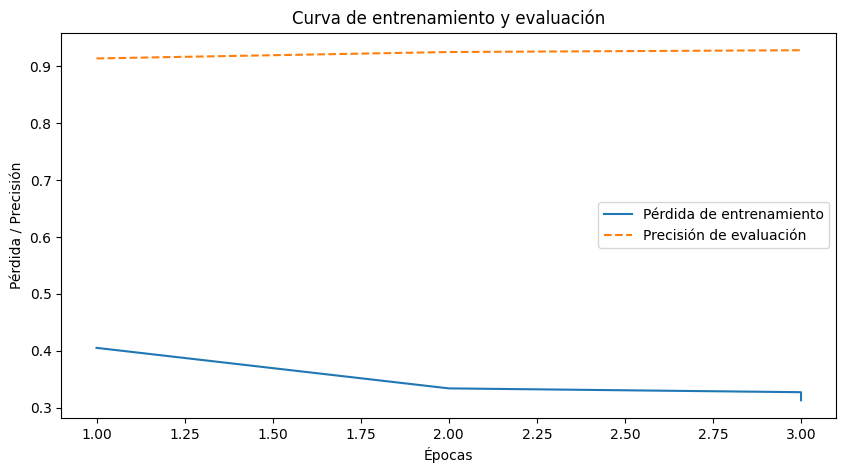

In [20]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Obtener el historial de entrenamiento
train_history = trainer.state.log_history

# Agrupar las pÃ©rdidas de entrenamiento por Ã©poca
loss_per_epoch = defaultdict(list)
for entry in train_history:
    if 'loss' in entry and 'epoch' in entry:
        loss_per_epoch[entry['epoch']].append(entry['loss'])

# Calcular la pÃ©rdida promedio por Ã©poca solo para el Ãºltimo valor de cada Ã©poca
avg_train_loss = [losses[-1] for epoch, losses in sorted(loss_per_epoch.items())]

# Extraer la precisiÃ³n de la evaluaciÃ³n y las Ã©pocas
eval_accuracy = [entry['eval_accuracy'] for entry in train_history if 'eval_accuracy' in entry]
epochs = [entry['epoch'] for entry in train_history if 'eval_accuracy' in entry]

# Graficar la pÃ©rdida de entrenamiento y precisiÃ³n de evaluaciÃ³n por Ã©poca
plt.figure(figsize=(10, 5))

plt.plot(epochs, avg_train_loss[:len(epochs)], label="PÃ©rdida de entrenamiento")
plt.plot(epochs, eval_accuracy, label="PrecisiÃ³n de evaluaciÃ³n", linestyle='--')

plt.xlabel("Ã‰pocas")
plt.ylabel("PÃ©rdida / PrecisiÃ³n")
plt.title("Curva de entrenamiento y evaluaciÃ³n")
plt.legend()
plt.show()


## Curva PrecisiÃ³n-Recall
De manera que podamos entender que tipo de errores podemos esperar del modelo

In [ ]:

# Obtener las predicciones y las etiquetas verdaderas
predictions = trainer.predict(test_dataset) # tomar las 3125 predicciones tomara un rato
y_true = predictions.label_ids
y_scores = predictions.predictions[:, 1]


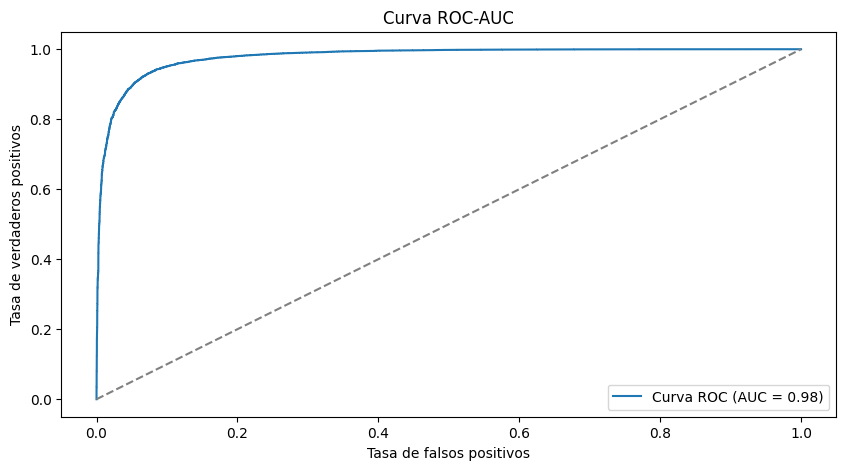

In [21]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC-AUC")
plt.legend()
plt.show()


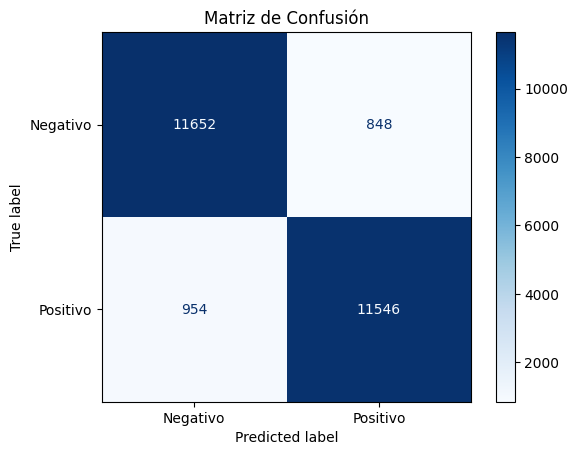

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusiÃ³n
cm = confusion_matrix(y_true, predictions.predictions.argmax(axis=-1))

# Graficar la matriz de confusiÃ³n
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negativo", "Positivo"])
disp.plot(cmap="Blues")
plt.title("Matriz de ConfusiÃ³n")
plt.show()